In [1]:
from scapy.all import *
import os
import gc
print(os.sys.path)

from scapy.layers.http import *

import pandas as pd
import numpy as np

['', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/home/ubuntu/.local/lib/python3.6/site-packages', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/usr/lib/python3/dist-packages/IPython/extensions', '/home/ubuntu/.ipython']


In [5]:
import time
explore(scapy.layers.http)
timestamp = time.time()
print(timestamp)
local_time = time.localtime(1499084904.913831)
time.strftime('%Y-%m-%d-%H-%M-%S%f', local_time)

Packets contained in scapy.layers.http:
Class       |Name
------------|-------------
HTTP        |HTTP 1
HTTPRequest |HTTP Request
HTTPResponse|HTTP Response
1570856136.5177944


'2017-07-03-12-28-24%f'

In [6]:
a = datetime.fromtimestamp(1499084904.913831)
print(a)
strftime('%A, %d/%m/%y, %H:%M:%S:%f', time.localtime(1499084904.913831))
"""
    #print('IP src_ip:', pkt[IP].src)
    #print('IP dst_id:', pkt[IP].dst)
    local_time = time.gmtime(pkt.time)
    #%H:%M:%S.%f
    local_time_transfered = time.strftime('%A, %d/%m/%y, %H:%M:%S:%f', local_time)
    print(str(pkt.time).split('.'))
    print(local_time_transfered)
    print(datetime.fromtimestamp(pkt.time))

    #print(pkt.flags)
    a = pkt.sprintf('%TCP.flags%')
    if (a == 'S'):
        #print("yes", a, pkt[IP].src, pkt[IP].dst)
        list_.append(pkt)
    """

2017-07-03 12:28:24.913831


'\n    #print(\'IP src_ip:\', pkt[IP].src)\n    #print(\'IP dst_id:\', pkt[IP].dst)\n    local_time = time.gmtime(pkt.time)\n    #%H:%M:%S.%f\n    local_time_transfered = time.strftime(\'%A, %d/%m/%y, %H:%M:%S:%f\', local_time)\n    print(str(pkt.time).split(\'.\'))\n    print(local_time_transfered)\n    print(datetime.fromtimestamp(pkt.time))\n\n    #print(pkt.flags)\n    a = pkt.sprintf(\'%TCP.flags%\')\n    if (a == \'S\'):\n        #print("yes", a, pkt[IP].src, pkt[IP].dst)\n        list_.append(pkt)\n    '

In [263]:
del features
list_ = []
features = {"src_ip":[], "dst_ip":[], "time_stamp":[], "protocol":[], 'TCP_flag': [], 'src_port':[], 'dst_port':[], 'packet_len':[], 'TCP_seq':[], 'TCP_window':[], 'TCP_ack':[]}

In [264]:
gc.collect()

0

In [271]:
a = 0
b = 0
for index,pkt in enumerate(PcapReader('day2_5.pcap')):
        #print(pkt.sprintf("%IP.len%"))
    if IP in pkt:
        features["time_stamp"].append(pkt.time)
        features['src_ip'].append(pkt[IP].src)
        features['dst_ip'].append(pkt[IP].dst)
        features['packet_len'].append(pkt.sprintf("%IP.len%"))
        if TCP in pkt:
            features['protocol'].append('TCP')
            features['TCP_seq'].append(pkt.getlayer(TCP).seq)
            features['TCP_window'].append(pkt.getlayer(TCP).window)
            features['TCP_ack'].append(pkt.getlayer(TCP).ack)
            features['src_port'].append(pkt[TCP].sport)
            features['dst_port'].append(pkt[TCP].dport)
            features['TCP_flag'].append(pkt.sprintf('%TCP.flags%'))
        elif UDP in pkt:
            features['protocol'].append('UDP')
            features['TCP_seq'].append('OTHER')
            features['TCP_window'].append('OTHER')
            features['TCP_ack'].append('OTHER')
            features['src_port'].append(pkt[UDP].sport)
            features['dst_port'].append(pkt[UDP].dport)
            features['TCP_flag'].append('OTHER')
        elif ICMP in pkt:
            features['TCP_seq'].append('OTHER')
            features['TCP_window'].append('OTHER')
            features['TCP_ack'].append('OTHER')
            features['protocol'].append('ICMP')
            features['src_port'].append('OTHER')
            features['dst_port'].append('OTHER')
            features['TCP_flag'].append('OTHER')
        else:
            features['TCP_seq'].append('OTHER')
            features['TCP_window'].append('OTHER')
            features['TCP_ack'].append('OTHER')
            features['protocol'].append('OTHER')
            features['TCP_flag'].append('OTHER')
            features['src_port'].append('OTHER')
            features['dst_port'].append('OTHER')

In [272]:
day_2_df = pd.DataFrame(features)
day_2_df.time_stamp = day_2_df.time_stamp.astype(np.float64)
#create this new feature to make it easy to group
day_2_df['src_to_dst_ip'] = day_2_df.src_ip +"->"+ day_2_df.dst_ip
# the standard deviation of time stamp between the messages between the same src_ip and dst_ip 
map_ = day_2_df.groupby(['src_to_dst_ip'])['time_stamp'].std()
day_2_df['time_std'] = day_2_df['src_to_dst_ip'].map(map_)
day_2_df.head()

,TCP_ack,TCP_flag,TCP_seq,TCP_window,dst_ip,dst_port,packet_len,protocol,src_ip,src_port,time_stamp,src_to_dst_ip,time_std
0,2633305935,A,3139966821,1355,13.107.4.50,80,40,TCP,192.168.10.15,49647,1.499086e+09,192.168.10.15->13.107.4.50,34.046562
1,3139966821,A,2633304475,1026,192.168.10.15,49647,1500,TCP,13.107.4.50,80,1.499086e+09,13.107.4.50->192.168.10.15,34.064540
2,OTHER,OTHER,OTHER,OTHER,192.168.10.50,123,76,UDP,67.215.197.149,123,1.499086e+09,67.215.197.149->192.168.10.50,68.000028
3,3139966821,A,2633305935,1026,192.168.10.15,49647,2960,TCP,13.107.4.50,80,1.499086e+09,13.107.4.50->192.168.10.15,34.064540
4,2633308855,A,3139966821,1361,13.107.4.50,80,40,TCP,192.168.10.15,49647,1.499086e+09,192.168.10.15->13.107.4.50,34.046562


In [273]:
#calculate the time interval between this message and its preceeding message between the same src_ip and dst_ip
for i in day_2_df['src_to_dst_ip'].value_counts().index:
    day_2_df.loc[day_2_df['src_to_dst_ip'] == i, 'time_interval'] = day_2_df[day_2_df['src_to_dst_ip'] == i].time_stamp.diff()

In [274]:
gc.collect()

12920

In [275]:
X = day_2_df

In [276]:
X.to_csv("Day2_5_raw.csv", index = False)

In [198]:
X.loc[X.src_port == 'OTHER', 'src_port'] = -1
X.loc[X.dst_port == 'OTHER', 'dst_port'] = -1

/usr/lib/python3/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [199]:
X['src_port'] = X['src_port'].astype(int)
X['dst_port'] = X['dst_port'].astype(int)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [200]:
# handel ip addresses 
# 1: internal ip
# 0: external ip
def search_ip_type(ip):
    ip_ = ip.split(".")
    if ip_[0] == '192' and ip_[1] == '168' and ip_[2] == '10':
        return 1
    return 0
X.dst_ip = X.dst_ip.apply(lambda x : search_ip_type(x))
X.src_ip = X.src_ip.apply(lambda x : search_ip_type(x))

/usr/lib/python3/dist-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [201]:
X.head()

,dst_ip,flag,protocol,src_ip,time_interval,src_port,dst_port,time_std
0,0,A,TCP,1,4.82051,43060,443,828.794579
1,1,A,TCP,0,4.82051,80,55848,1771.272143
2,1,A,TCP,0,4.82051,443,43060,824.949176
3,1,PA,TCP,0,4.82051,443,59225,3158.862252
4,0,A,TCP,1,4.82051,59225,443,3159.276100


In [202]:
# hanlde protocol: arbitrary encoding to decrease the dimension

print(X.protocol.value_counts())
X_encode = X.protocol.value_counts().reset_index()
X_encode['encode'] = range(X_encode.shape[0])

map_protocol = X_encode.set_index('index')['encode'] + 1
X.protocol = X.protocol.map(map_protocol)

TCP      3284047
UDP       277168
ICMP         906
OTHER        206
Name: protocol, dtype: int64


/usr/lib/python3/dist-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [203]:
# handle flag: arbitrary encoding to decrease the dimension
print(X.flag.value_counts())
flag_map = {
    "S":1,
    "SA":2,
    "A":3
}
def flag_map_(x):
    if x in flag_map:
        return flag_map[x]
    else:
        return 4
X.flag = X.flag.apply(lambda x : flag_map_(x))

A        1858633
PA        526713
S         294333
OTHER     278280
RA        263477
FA        138669
SA        133352
FPA        51195
R          17561
SEC           41
PAC           40
SAE           31
FAN            2
Name: flag, dtype: int64


/usr/lib/python3/dist-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [204]:
# handle src_port and dst_port : frequency encoding
src_port_map = X.src_port.value_counts()
dst_port_map = X.dst_port.value_counts()
X.src_port = X.src_port.map(src_port_map)
X.dst_port = X.dst_port.map(dst_port_map)

/usr/lib/python3/dist-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [295]:
X

,dst_ip,flag,protocol,src_ip,time_interval,src_port,dst_port,time_std,dst_ip_internal
0,192.168.10.14,A,TCP,13.107.4.50,0.213304,80,51197,8.627729,1
1,13.107.4.50,A,TCP,192.168.10.14,0.213304,51197,80,11.222483,0
2,192.168.10.14,A,TCP,13.107.4.50,0.000192,80,51197,8.627729,1
3,13.107.4.50,A,TCP,192.168.10.14,0.000330,51197,80,11.222483,0
4,192.168.10.14,A,TCP,13.107.4.50,0.000193,80,51197,8.627729,1
5,192.168.10.14,A,TCP,13.107.4.50,0.000191,80,51197,8.627729,1
6,192.168.10.14,A,TCP,13.107.4.50,0.000192,80,51197,8.627729,1
7,13.107.4.50,A,TCP,192.168.10.14,0.000502,51197,80,11.222483,0
8,192.168.10.14,A,TCP,13.107.4.50,0.000192,80,51197,8.627729,1
9,192.168.10.14,A,TCP,13.107.4.50,0.000192,80,51197,8.627729,1


In [206]:
X.fillna(X.mean(), inplace = True)

/usr/lib/python3/dist-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [207]:
X.isnull().any().any()

False

In [208]:
X.to_csv("TestData_processed.csv", index = False)

In [210]:
X_test = X

In [211]:
X_test

,dst_ip,flag,protocol,src_ip,time_interval,src_port,dst_port,time_std
0,0,3,1,1,4.820510e+00,27,554983,828.794579
1,1,3,1,0,4.820510e+00,720727,91,1771.272143
2,1,3,1,0,4.820510e+00,642259,22,824.949176
3,1,4,1,0,4.820510e+00,642259,36,3158.862252
4,0,3,1,1,4.820510e+00,48,554983,3159.276100
5,0,4,1,1,9.337902e-03,48,554983,3159.276100
6,0,3,1,1,4.820510e+00,20,554983,13.768338
7,1,3,1,0,4.820510e+00,642259,16,14.503731
8,0,4,1,1,4.820510e+00,161,554983,4148.027463
9,1,3,1,0,1.045210e-01,642259,36,3158.862252


In [2]:
import pandas as pd
import numpy as np
X_total = pd.read_csv("day2_1_processed.csv").reset_index(drop = True)

In [2]:
X = X_total.sample(frac = 0.01)

In [91]:
X.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [18]:
X.reset_index(drop = True, inplace = True)

In [19]:
X

,dst_ip,flag,protocol,src_ip,time_interval,src_port,dst_port,time_std
0,0,3,1,1,0.000178,194578,300078,48.734366
1,1,4,1,0,0.000192,390646,259137,48.420823
2,1,4,2,1,0.001191,6393,11,89.002196
3,1,4,1,0,0.000193,390646,259137,48.420823
4,1,3,1,0,0.000193,390646,1122,3.639157
5,1,3,1,0,0.000227,390646,259137,48.420823
6,1,3,1,0,0.000192,390646,259137,48.420823
7,1,3,1,0,0.000458,390646,259137,48.420823
8,1,3,1,0,0.000191,390646,100985,8.627729
9,1,3,1,0,0.000193,390646,259137,48.420823


# DBSCAN ： V1

In [3]:
#the min_samples can be used to mitigate the effects of curse of high dimensionality in distance based clustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
X_Scaled = StandardScaler().fit_transform(X)
clustering = DBSCAN(eps=5, min_samples=16).fit(X_Scaled)


In [5]:
clustering

DBSCAN(algorithm='auto', eps=5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=16, n_jobs=None, p=None)

In [9]:
cluster_labels = pd.Series(clustering.labels_)

In [ ]:
cluster_labels.value_counts()

In [34]:
X[cluster_labels == 1].protocol.value_counts()

2    162
Name: protocol, dtype: int64

In [37]:
cluster_cores = pd.Series(clustering.core_sample_indices_)

In [40]:
#percentgate of cores
cluster_cores.shape[0]/X.shape[0]

0.9971181556195965

# DBSCAN：V2

In [42]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
X_Scaled = StandardScaler().fit_transform(X)
clustering = DBSCAN(eps=3, min_samples=16).fit(X_Scaled)

In [43]:
cluster_labels = pd.Series(clustering.labels_)

In [44]:
cluster_labels.value_counts()

 0    7292
 1     442
 2     161
 4      31
 3      28
-1      27
dtype: int64

In [180]:
X[cluster_labels == 3]

,dst_ip,flag,protocol,src_ip,time_interval,src_port,dst_port,time_std
15,0,1,1,1,2.843917,5,42192,4.101985
30,0,1,1,1,0.000044,7,42192,26.759172
63,0,1,1,1,0.000100,14,300078,1.971873
207,0,1,1,1,0.300493,1,42192,0.369662
333,0,1,1,1,0.000489,9,42192,26.759172
352,0,1,1,1,0.006752,72,42192,26.759172
422,0,1,1,1,0.000259,9,42192,26.759172
659,0,1,1,1,0.005203,22,42192,45.179850
770,0,1,1,1,0.000071,7,42192,26.759172
1016,0,1,1,1,0.213304,23,300078,110.245203


In [83]:
cluster_cores = pd.Series(clustering.core_sample_indices_)

In [84]:
cluster_cores.shape[0]/X.shape[0]

0.9937351209121664

In [85]:
cluster_cores

0          0
1          1
2          2
3          3
4          4
5          5
6          6
7          7
8          8
9          9
10        10
11        11
12        12
13        13
14        14
15        15
16        16
17        17
18        18
19        19
20        20
21        21
22        22
23        23
24        24
25        25
26        26
27        27
28        28
29        29
        ... 
7901    7951
7902    7952
7903    7953
7904    7954
7905    7955
7906    7956
7907    7957
7908    7958
7909    7959
7910    7960
7911    7961
7912    7962
7913    7963
7914    7964
7915    7965
7916    7966
7917    7967
7918    7968
7919    7969
7920    7970
7921    7971
7922    7972
7923    7973
7924    7974
7925    7975
7926    7976
7927    7977
7928    7978
7929    7979
7930    7980
Length: 7931, dtype: int64

# K-means  ： V1

In [92]:
X_total.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [94]:
X_total.head()

,dst_ip,flag,protocol,src_ip,time_interval,src_port,dst_port,time_std
0,1,3,1,0,0.213304,390646,100985,8.627729
1,0,3,1,1,0.213304,80088,300078,11.222483
2,1,3,1,0,0.000192,390646,100985,8.627729
3,0,3,1,1,0.000330,80088,300078,11.222483
4,1,3,1,0,0.000193,390646,100985,8.627729


In [97]:
X_total.shape

(798056, 8)

In [119]:
from sklearn.cluster import KMeans
X_Scaled = StandardScaler().fit_transform(X_total)
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_Scaled)
kmeans.labels_

array([0, 1, 0, ..., 1, 0, 1], dtype=int32)

In [120]:
kmeans_label = pd.Series(kmeans.labels_)

In [123]:
#cluser 2: From the result we can see that it is majorily clustered by the type of ip, both clusters are of compariable
#shape, one cluster is dst_ip == 1 and src_ip == 0, the other is src_ip == 1 and dst_ip == 1, now we change the number of
#clusters
X_total[kmeans_label == 1]

,dst_ip,flag,protocol,src_ip,time_interval,src_port,dst_port,time_std
1,0,3,1,1,0.213304,80088,300078,11.222483
3,0,3,1,1,0.000330,80088,300078,11.222483
7,0,3,1,1,0.000502,80088,300078,11.222483
11,0,3,1,1,0.000504,80088,300078,11.222483
14,0,3,1,1,0.000499,80088,300078,11.222483
18,0,3,1,1,0.000509,80088,300078,11.222483
21,0,3,1,1,0.000490,80088,300078,11.222483
23,0,3,1,1,0.000237,80088,300078,11.222483
26,0,3,1,1,0.000307,80088,300078,11.222483
28,0,3,1,1,0.000188,80088,300078,11.222483


In [126]:
X_total[kmeans_label == 1].src_ip.value_counts()

1    361992
0       348
Name: src_ip, dtype: int64

# K-means ： V2

In [167]:
from sklearn.cluster import KMeans
X_Scaled = StandardScaler().fit_transform(X_total)
kmeans = KMeans(n_clusters=5).fit(X_Scaled)
kmeans_label = pd.Series(kmeans.labels_)

In [169]:
kmeans_label.value_counts()

0    343487
2    262392
1    173493
3     16871
4      1813
dtype: int64

In [181]:
X_total[kmeans_label == 3]

,dst_ip,flag,protocol,src_ip,time_interval,src_port,dst_port,time_std
1522,0,4,2,1,2.133041e-01,937,937,124.543024
1523,0,4,2,1,2.133041e-01,937,937,135.046101
1525,0,4,2,1,2.133041e-01,937,937,129.197529
1526,0,4,2,1,2.133041e-01,937,937,128.029916
1527,0,4,2,1,2.133041e-01,937,937,122.627306
1528,0,4,2,1,2.133041e-01,937,937,123.460744
1732,1,4,2,0,2.133041e-01,937,937,135.045970
1781,1,4,2,0,2.133041e-01,937,937,122.625163
1789,1,4,2,0,2.133041e-01,937,937,128.027886
1794,1,4,2,0,2.133041e-01,937,937,124.542883


In [183]:
#https://www.sciencedirect.com/science/article/pii/S0031320319301608
#However, when the data has well separated clusters, the performance of k-means depends 
#completely on the goodness of the initialization. Therefore, if high clustering accuracy
#is needed, a better algorithm should be used instead.

# OCSVM

In [136]:
#characteristic : time interval of the class labled 1
#is very small, the mean is about 0.002574, the other class
#labeled -1, its mean of time interval is about 0.43
#the average time interval is about 0.2054
from sklearn.svm import OneClassSVM
ocsvm = OneClassSVM(nu=0.1, kernel="rbf", gamma=1)

In [137]:
X_sampled = X_total.sample(frac = 0.1).reset_index(drop = True)

In [138]:
X_sampled.time_interval.mean()

0.22264043145945897

In [139]:
X_sampled.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [140]:
ocsvm_ = ocsvm.fit(X_sampled)

In [141]:
pred_ocsvm = pd.Series(ocsvm_.predict(X_sampled))

In [142]:
X_sampled[pred_ocsvm == 1].describe()

,dst_ip,flag,protocol,src_ip,time_interval,src_port,dst_port,time_std
count,70273.000000,70273.000000,70273.000000,70273.000000,70273.000000,70273.000000,70273.000000,70273.000000
mean,0.571414,3.030538,1.012323,0.440084,0.001344,274840.073812,233362.028845,37.117974
std,0.494877,0.198987,0.110325,0.496401,0.015728,134532.305965,92392.371550,19.348929
min,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.037506
25%,0.000000,3.000000,1.000000,0.000000,0.000192,194578.000000,259137.000000,11.222483
50%,1.000000,3.000000,1.000000,0.000000,0.000196,390646.000000,259137.000000,48.420823
75%,1.000000,3.000000,1.000000,1.000000,0.000267,390646.000000,300078.000000,48.734366
max,1.000000,4.000000,2.000000,1.000000,0.802628,390646.000000,300078.000000,115.755106


In [145]:
X_sampled[pred_ocsvm == -1].describe()

,dst_ip,flag,protocol,src_ip,time_interval,src_port,dst_port,time_std
count,9533.000000,9533.000000,9533.000000,9533.000000,9.533000e+03,9533.000000,9533.000000,9533.000000
mean,0.543795,3.318892,1.095668,0.566034,1.853935e+00,57986.191755,55442.756740,32.447641
std,0.498104,0.627440,0.303627,0.495646,9.610741e+00,117633.937067,100569.830629,33.769211
min,0.000000,1.000000,1.000000,0.000000,-9.536743e-07,1.000000,1.000000,0.000002
25%,0.000000,3.000000,1.000000,0.000000,1.471043e-04,35.000000,38.000000,5.418950
50%,1.000000,3.000000,1.000000,1.000000,2.908707e-04,4067.000000,4440.000000,21.288746
75%,1.000000,4.000000,1.000000,1.000000,3.904986e-02,44702.000000,42192.000000,48.652950
max,1.000000,4.000000,4.000000,1.000000,2.501016e+02,390646.000000,300078.000000,184.554986


# Isolation Tree

In [162]:
#has simmilar but more significant result than ovsvm, but the result is still based on the 
#time interval in the sense that the anomoly instance has much bigger time_interval which is
#not desired, since the attack tends to have much smaller time interval, indicates our features
#may have some problem
from sklearn.ensemble import IsolationForest
IF = IsolationForest(behaviour='new',contamination=0.01,random_state=42)

In [163]:
IF_ = IF.fit(X_sampled)

In [164]:
IF_result = pd.Series(IF_.predict(X_sampled))

In [165]:
X_sampled[IF_result == -1].describe()

,dst_ip,flag,protocol,src_ip,time_interval,src_port,dst_port,time_std
count,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000
mean,0.689612,3.619524,1.594493,0.754693,16.823301,31115.633292,26308.010013,90.503576
std,0.462942,0.749549,0.498891,0.430538,28.328591,90895.806708,70269.702737,34.889393
min,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.045219
25%,0.000000,3.000000,1.000000,1.000000,0.213304,15.000000,14.000000,71.208025
50%,1.000000,4.000000,2.000000,1.000000,2.280038,937.000000,937.000000,103.791631
75%,1.000000,4.000000,2.000000,1.000000,20.011261,6393.000000,7177.000000,115.657001
max,1.000000,4.000000,3.000000,1.000000,250.101648,390646.000000,300078.000000,184.554986


In [166]:
X_sampled[IF_result == 1].describe()

,dst_ip,flag,protocol,src_ip,time_interval,src_port,dst_port,time_std
count,79007.000000,79007.000000,79007.000000,79007.000000,7.900700e+04,79007.000000,79007.000000,79007.000000
mean,0.566886,3.059374,1.016492,0.452099,5.475749e-02,251139.234270,213988.197919,36.014560
std,0.495509,0.287635,0.129723,0.497703,7.667180e-01,148982.902832,108506.858688,20.757496
min,0.000000,1.000000,1.000000,0.000000,-9.536743e-07,1.000000,1.000000,0.000002
25%,0.000000,3.000000,1.000000,0.000000,1.919270e-04,80088.000000,100985.000000,11.222483
50%,1.000000,3.000000,1.000000,0.000000,2.000332e-04,194578.000000,259137.000000,48.420823
75%,1.000000,3.000000,1.000000,1.000000,2.880096e-04,390646.000000,300078.000000,48.734366
max,1.000000,4.000000,4.000000,1.000000,4.502244e+01,390646.000000,300078.000000,157.868534


# LocalOutlierFactor

In [180]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
lof = LocalOutlierFactor(n_neighbors=35, contamination=0.01)

In [181]:
X_Scaled_sampled = StandardScaler().fit_transform(X_sampled)

In [182]:
lof_pred = pd.Series(lof.fit_predict(X_Scaled_sampled))

In [185]:
X_sampled[lof_pred == -1].describe()

,dst_ip,flag,protocol,src_ip,time_interval,src_port,dst_port,time_std
count,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000
mean,0.631910,3.082915,1.092965,0.451005,0.028870,240408.697236,163158.178392,33.494913
std,0.482589,0.443723,0.338551,0.497907,0.195471,164389.593588,133492.099107,22.925749
min,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,2.000000,1.100662
25%,0.000000,3.000000,1.000000,0.000000,0.000178,80088.000000,7177.000000,11.222483
50%,1.000000,3.000000,1.000000,0.000000,0.000212,390646.000000,259137.000000,48.420823
75%,1.000000,3.000000,1.000000,1.000000,0.000299,390646.000000,300078.000000,48.420823
max,1.000000,4.000000,4.000000,1.000000,2.900187,390646.000000,300078.000000,91.975431


# Multi Gaussian Distribution

In [2]:
from scapy.all import *
import os
import gc
print(os.sys.path)

from scapy.layers.http import *

import pandas as pd
import numpy as np

['', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/home/ubuntu/.local/lib/python3.6/site-packages', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/usr/lib/python3/dist-packages/IPython/extensions', '/home/ubuntu/.ipython']


In [3]:
#del X_train
#del X_test

#X_train_1 = pd.read_csv("Day2_1_raw.csv")
#X_train_2 = pd.read_csv("Day2_2_raw.csv")
#X_train_3 = pd.read_csv("Day2_3_raw.csv")
#X_train_4 = pd.read_csv("Day2_4_raw.csv")
#X_train_5 = pd.read_csv("Day2_5_raw.csv")

X_test = pd.read_csv("TestData_raw.csv")
X_train = pd.read_csv("combined_X_train.csv")

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
#X_train = pd.concat([X_train_1, X_train_2, X_train_3, X_train_4, X_train_5], axis = 0).reset_index(drop = True)

In [15]:
#X_train.to_csv("combined_X_train.csv", index = False)

In [21]:
X_train[X_train.dst_port == X_train.src_port].protocol.value_counts()

UDP      12131
ICMP       472
OTHER       87
Name: protocol, dtype: int64

In [4]:
X_train.time_stamp = X_train.time_stamp - X_train.time_stamp.min()
X_train.time_stamp = X_train.time_stamp.astype(int)
X_test.time_stamp = X_test.time_stamp - X_test.time_stamp.min()
X_test.time_stamp = X_test.time_stamp.astype(int)

In [5]:
#time interval in train
X_train.time_stamp.max() - X_train.time_stamp.min()

3012

In [6]:
#packets per seconds in train
X_train.shape[0]/(X_train.time_stamp.max() - X_train.time_stamp.min())

1589.2938247011953

In [7]:
##time interval in test
X_test.time_stamp.max() - X_test.time_stamp.min()

10961

In [8]:
##packets per seconds in test
X_test.shape[0]/(X_test.time_stamp.max() - X_test.time_stamp.min())

325.00018246510353

In [9]:
#handle the type of ip: public ip or private ip
def search_ip_type(ip):
# 1:private ip
# 0:public ip
    ip_ = ip.split(".")
    if ip_[0] == '192' and ip_[1] == '168' and ip_[2] == '10':
        return 1
    return 0

def get_internal_ip(df):
    
    df['dst_ip_internal'] = df.dst_ip.apply(lambda x : search_ip_type(x))
    df['src_ip_internal'] = df.src_ip.apply(lambda x : search_ip_type(x))

get_internal_ip(X_test)
get_internal_ip(X_train)

In [10]:
print("shape of train: ",X_train.shape)
print("shape of test: ",X_test.shape)

shape of train:  (4786953, 16)
shape of test:  (3562327, 16)


In [11]:
X_test.time_stamp.iloc[0]

0

In [12]:
def handle_OTHER(x):
    if x == "OTHER":
        return -1
    else: return int(x)

X_test.dst_port = X_test.dst_port.apply(lambda x:handle_OTHER(x))
X_test.src_port = X_test.dst_port.apply(lambda x:handle_OTHER(x))
X_train.dst_port = X_train.dst_port.apply(lambda x:handle_OTHER(x))
X_train.src_port = X_train.src_port.apply(lambda x:handle_OTHER(x))

In [13]:
X_train.dst_port.value_counts().head()

80       1709888
49647    1655638
443       322484
50098     306076
51197     100992
Name: dst_port, dtype: int64

In [14]:
X_train_ = X_train[['TCP_flag', 'time_stamp']]
X_test_ = X_test[['TCP_flag', 'time_stamp']]

In [15]:
#X_test_.protocol.value_counts()

# features: count of S - SA, count of public src_ip, count of private src_ip

In [16]:
#these ports are common in normal day
port_dict = { 
        80:"HTTP",
        443:"HTTPS",
        22:"SSH",
        53:"DNS",
    }

#these flag are we especially care about, since the distribution of S and SA are significantly different in normal and
#attack day

TCP_flag_dict = {
        "A":"A",
        "SA":"SA",
        "S":"S"
    }

#handle port and flag
#X_test_.dst_port = X_test_.dst_port.map(port_dict)
#X_test_.src_port = X_test_.src_port.map(port_dict)
#X_train.dst_port = X_train.dst_port.map(port_dict)
#X_train.src_port = X_train.src_port.map(port_dict)

X_test_.TCP_flag = X_test_.TCP_flag.map(TCP_flag_dict)
X_train_.TCP_flag = X_train_.TCP_flag.map(TCP_flag_dict)

#X_train.dst_port.fillna("OTHER", inplace = True)
#X_test_.dst_port.fillna("OTHER", inplace = True)
#X_train.src_port.fillna("OTHER", inplace = True)
#X_test_.src_port.fillna("OTHER", inplace = True)

X_train_.TCP_flag.fillna("OTHER", inplace = True)
X_test_.TCP_flag.fillna("OTHER", inplace = True)

#X_train.TCP_ack = X_train.TCP_ack.apply(lambda x : -1 if x == 'OTHER' else x)
#X_test.TCP_ack = X_test.TCP_ack.apply(lambda x : -1 if x == 'OTHER' else x)
#X_train.TCP_seq = X_train.TCP_seq.apply(lambda x : -1 if x == 'OTHER' else x)
#X_test.TCP_seq = X_test.TCP_seq.apply(lambda x : -1 if x == 'OTHER' else x)
#X_train.TCP_window = X_train.TCP_window.apply(lambda x : -1 if x == 'OTHER' else x)
#X_test.TCP_window = X_test.TCP_window.apply(lambda x : -1 if x == 'OTHER' else x)
"""
X_train.time_std.fillna(-1, inplace = True)
X_test.time_std.fillna(-1, inplace = True)
X_train.time_interval.fillna(-1, inplace = True)
X_test.time_interval.fillna(-1, inplace = True)
X_train.dst_port.fillna(-1, inplace = True)
X_test.dst_port.fillna(-1, inplace = True)
X_train.src_port.fillna(-1, inplace = True)
X_test.src_port.fillna(-1, inplace = True)

def convert_type(X_train):
    X_train.TCP_ack = X_train.TCP_ack.astype(int)
    X_train.TCP_seq = X_train.TCP_seq.astype(int)
    X_train.TCP_window = X_train.TCP_window.astype(int)
    #X_train.src_port = X_train.src_port.astype(int)
    #X_train.dst_port = X_train.dst_port.astype(int)
    X_train.time_std = X_train.time_std.astype(np.float64)
    X_train.time_interval = X_train.time_interval.astype(np.float64)
    X_train.packet_len = X_train.packet_len.astype(int)
    X_train.time_stamp = X_train.time_stamp.astype(np.float64)

convert_type(X_train)
convert_type(X_test)

X_train_dummies = pd.get_dummies(X_train)
X_test_dummies = pd.get_dummies(X_test)

print("dummies shape: ",X_train_dummies.shape, X_test_dummies.shape)
"""

/usr/lib/python3/dist-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/usr/lib/python3/dist-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


'\nX_train.time_std.fillna(-1, inplace = True)\nX_test.time_std.fillna(-1, inplace = True)\nX_train.time_interval.fillna(-1, inplace = True)\nX_test.time_interval.fillna(-1, inplace = True)\nX_train.dst_port.fillna(-1, inplace = True)\nX_test.dst_port.fillna(-1, inplace = True)\nX_train.src_port.fillna(-1, inplace = True)\nX_test.src_port.fillna(-1, inplace = True)\n\ndef convert_type(X_train):\n    X_train.TCP_ack = X_train.TCP_ack.astype(int)\n    X_train.TCP_seq = X_train.TCP_seq.astype(int)\n    X_train.TCP_window = X_train.TCP_window.astype(int)\n    #X_train.src_port = X_train.src_port.astype(int)\n    #X_train.dst_port = X_train.dst_port.astype(int)\n    X_train.time_std = X_train.time_std.astype(np.float64)\n    X_train.time_interval = X_train.time_interval.astype(np.float64)\n    X_train.packet_len = X_train.packet_len.astype(int)\n    X_train.time_stamp = X_train.time_stamp.astype(np.float64)\n\nconvert_type(X_train)\nconvert_type(X_test)\n\nX_train_dummies = pd.get_dummies(X

In [17]:
X_test_dummies = pd.get_dummies(X_test_)
X_train_dummies = pd.get_dummies(X_train_)

In [18]:
#now time stamp has converted to int
X_test_dummies.head().time_stamp

0    0
1    0
2    0
3    0
4    0
Name: time_stamp, dtype: int64

In [19]:
#print('pkts per second in train:', X_train_dummies.time_stamp.value_counts().mean())
print('pkts per second in test:', X_test_dummies.time_stamp.value_counts().mean())

pkts per second in test: 331.0405166806059


In [20]:
X_test_dummies['count'] = np.ones(X_test_dummies.shape[0])
X_train_dummies['count'] = np.ones(X_train_dummies.shape[0])

In [21]:
X_train_dummies

,time_stamp,TCP_flag_A,TCP_flag_OTHER,TCP_flag_S,TCP_flag_SA,count
0,0,1,0,0,0,1.0
1,0,1,0,0,0,1.0
2,0,1,0,0,0,1.0
3,0,1,0,0,0,1.0
4,0,1,0,0,0,1.0
5,0,1,0,0,0,1.0
6,0,1,0,0,0,1.0
7,0,1,0,0,0,1.0
8,0,1,0,0,0,1.0
9,0,1,0,0,0,1.0


In [22]:
time_aggre_train = X_train_dummies.groupby(X_train_dummies.time_stamp).sum()
time_aggre_test = X_test_dummies.groupby(X_test_dummies.time_stamp).sum()

In [34]:
time_aggre_test['S_A'] = time_aggre_test.TCP_flag_S - time_aggre_test.TCP_flag_SA
time_aggre_train['S_A'] = time_aggre_train.TCP_flag_S - time_aggre_train.TCP_flag_SA

In [35]:
time_aggre_test['S_A_ratio'] = time_aggre_test['S_A']/time_aggre_test['count']
time_aggre_train['S_A_ratio'] = time_aggre_train['S_A']/time_aggre_train['count']

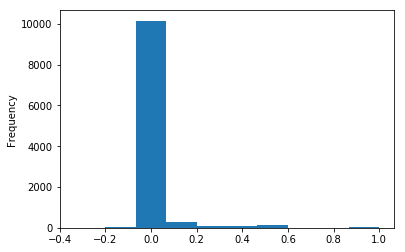

In [36]:
time_aggre_test['S_A_ratio'].plot.hist()

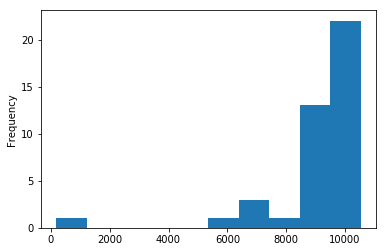

In [26]:
pd.Series(time_aggre_test[time_aggre_test['S_A_ratio'] > 0.8].index).plot.hist()

In [37]:
time_aggre_test.describe()

,TCP_flag_A,TCP_flag_OTHER,TCP_flag_S,TCP_flag_SA,count,S_A,S_A_ratio
count,10761.000000,10761.000000,10761.000000,10761.000000,10761.000000,10761.000000,10761.000000
mean,172.719357,118.577177,27.351826,12.392157,331.040517,14.959669,0.018606
std,349.231940,222.527136,122.862165,32.623499,609.194812,118.775295,0.091748
min,0.000000,0.000000,0.000000,0.000000,1.000000,-24.000000,-0.333333
25%,15.000000,7.000000,0.000000,0.000000,27.000000,0.000000,0.000000
50%,36.000000,25.000000,1.000000,0.000000,64.000000,0.000000,0.000000
75%,114.000000,111.000000,6.000000,5.000000,262.000000,0.000000,0.000000
max,4483.000000,1800.000000,1063.000000,270.000000,4934.000000,999.000000,1.000000


In [40]:
X_test_final = time_aggre_test[['count', 'S_A']]
X_train_final = time_aggre_train[['count', 'S_A']]

In [38]:
time_aggre_train.describe()

,TCP_flag_A,TCP_flag_OTHER,TCP_flag_S,TCP_flag_SA,count,S_A,S_A_ratio
count,3012.000000,3012.00000,3012.000000,3012.000000,3012.000000,3012.000000,3012.000000
mean,1411.941899,162.12251,7.679283,7.550133,1589.293825,0.129150,0.001095
std,2465.217839,214.73479,12.399931,12.328201,2515.556339,2.308976,0.014264
min,1.000000,0.00000,0.000000,0.000000,2.000000,-14.000000,-0.060606
25%,49.000000,40.00000,0.000000,0.000000,98.000000,0.000000,0.000000
50%,124.000000,84.00000,2.000000,2.000000,275.500000,0.000000,0.000000
75%,1351.250000,206.00000,10.000000,10.000000,2188.000000,0.000000,0.000000
max,16162.000000,2575.00000,94.000000,92.000000,17602.000000,26.000000,0.375000


In [43]:
X_train_final = X_train_final/5

In [60]:
X_test_final.shape[0]

10761

In [62]:
X_test_final = X_test_final.reset_index()

In [68]:
X_train_final = X_train_final.reset_index()

In [51]:
X_test_final['count'].mean()

331.0405166806059

In [52]:
from sklearn.ensemble import IsolationForest
IF = IsolationForest(behaviour='new',contamination=0.01,random_state=42)

In [54]:
preds_IF = pd.Series(IF.fit_predict(X_test_final))

In [55]:
preds_IF.value_counts()

 1    10656
-1      105
dtype: int64

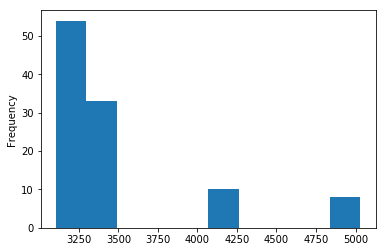

In [66]:
pd.Series(X_test_final[preds_IF == -1].time_stamp).plot.hist()

In [69]:
IF.fit(X_train_final)
preds_IF_2 = pd.Series(IF.predict(X_test_final))

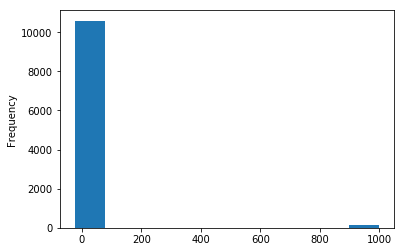

In [93]:
X_test_final.S_A.plot.hist()

In [73]:
X_test_final[preds_IF_2 == -1].head()

,time_stamp,count,S_A
3,3,106.0,4.0
10,10,53.0,6.0
11,11,99.0,5.0
29,29,328.0,3.0
41,41,675.0,-2.0


In [133]:
import numpy as np
from sklearn import mixture
np.random.seed(1)
g = mixture.GaussianMixture(n_components=1, covariance_type = "full")
g.fit(X_train_final[['count', 'S_A']])

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=1, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [134]:
g.weights_

array([1.])

In [135]:
res_ = pd.Series(g.predict_proba(X_test_final[['count', 'S_A']]).reshape(1, -1)[0])

In [136]:
X_test_final[res_ < 0.00000001]

,time_stamp,count,S_A


In [143]:
from sklearn.svm import OneClassSVM
ocsvm = OneClassSVM(nu=0.01, kernel="rbf", gamma=1)

In [150]:
ocsvm = ocsvm.fit(X_train_final)
OCSVM_preds=pd.Series(ocsvm.predict(X_test_final))

In [151]:
X_test_final[OCSVM_preds == -1]

,time_stamp,count,S_A
0,0,225.0,0.0
1,1,97.0,0.0
2,2,56.0,2.0
3,3,106.0,4.0
4,4,61.0,2.0
5,5,51.0,1.0
6,6,110.0,0.0
7,7,47.0,1.0
8,8,44.0,1.0
9,9,94.0,0.0


In [27]:
time_stamp_index = time_aggre_test[time_aggre_test['S_A'] > 900].index

In [28]:
# trace back to original data
X_test[(X_test.time_stamp.isin(time_stamp_index))][-1000:]

,TCP_ack,TCP_flag,TCP_seq,TCP_window,dst_ip,dst_port,packet_len,protocol,src_ip,src_port,time_stamp,src_to_dst_ip,time_std,time_interval,dst_ip_internal,src_ip_internal
1293453,0,S,2492502249,1024,192.168.10.50,5004,44,TCP,107.22.224.100,5004,5018,107.22.224.100->192.168.10.50,2296.053968,3.385544e-05,1,0
1293454,2492502250,RA,0,0,107.22.224.100,36114,40,TCP,192.168.10.50,36114,5018,192.168.10.50->107.22.224.100,2314.621462,4.410744e-05,0,1
1293455,0,S,2492502249,1024,192.168.10.50,1521,44,TCP,107.22.224.100,1521,5018,107.22.224.100->192.168.10.50,2296.053968,2.098083e-05,1,0
1293456,2492502250,RA,0,0,107.22.224.100,36114,40,TCP,192.168.10.50,36114,5018,192.168.10.50->107.22.224.100,2314.621462,1.096725e-05,0,1
1293457,2492502250,RA,0,0,107.22.224.100,36114,40,TCP,192.168.10.50,36114,5018,192.168.10.50->107.22.224.100,2314.621462,4.196167e-05,0,1
1293458,0,S,2492502249,1024,192.168.10.50,497,44,TCP,107.22.224.100,497,5018,107.22.224.100->192.168.10.50,2296.053968,5.102158e-05,1,0
1293459,0,S,2492502249,1024,192.168.10.50,7512,44,TCP,107.22.224.100,7512,5018,107.22.224.100->192.168.10.50,2296.053968,3.004074e-05,1,0
1293460,2492502250,RA,0,0,107.22.224.100,36114,40,TCP,192.168.10.50,36114,5018,192.168.10.50->107.22.224.100,2314.621462,5.793571e-05,0,1
1293461,2492502250,RA,0,0,107.22.224.100,36114,40,TCP,192.168.10.50,36114,5018,192.168.10.50->107.22.224.100,2314.621462,2.193451e-05,0,1
1293462,0,S,2492502249,1024,192.168.10.50,2099,44,TCP,107.22.224.100,2099,5018,107.22.224.100->192.168.10.50,2296.053968,6.914139e-05,1,0


# The hugh difference between S and SA in time intervals between Training and Testing, by comparing the difference between top S and top SA, we choose the appropriate time interval 

In [57]:
print("Flag S top time_interval in training: ", time_aggre_train.TCP_flag_S.sort_values(ascending = False).head())
print("FLag SA top time_interval in training: ", time_aggre_train.TCP_flag_SA.sort_values(ascending = False).head())

Flag S top time_interval in training:  time_stamp
884     94.0
882     92.0
2382    92.0
1034    90.0
2383    90.0
Name: TCP_flag_S, dtype: float64
FLag SA top time_interval in training:  time_stamp
882     92.0
2382    91.0
1034    90.0
884     90.0
2383    89.0
Name: TCP_flag_SA, dtype: float64


In [58]:
print("Flag S top time_interval in testing: ", time_aggre_test.TCP_flag_S.sort_values(ascending = False).head()) 
print("Flag SA top time_interval in testing: ", time_aggre_test.TCP_flag_SA.sort_values(ascending = False).head()) 

Flag S top time_interval in testing:  time_stamp
4922    1063.0
3343    1043.0
3257    1035.0
3348    1031.0
4206    1030.0
Name: TCP_flag_S, dtype: float64
Flag SA top time_interval in testing:  time_stamp
7248    270.0
7932    264.0
8170    257.0
7596    245.0
7956    238.0
Name: TCP_flag_SA, dtype: float64


# Thence we make the difference of S and SA to be a new feature

In [59]:
time_aggre_train['S-SA'] = time_aggre_train.TCP_flag_S - time_aggre_train.TCP_flag_SA
time_aggre_test['S-SA'] = time_aggre_test.TCP_flag_S - time_aggre_test.TCP_flag_SA

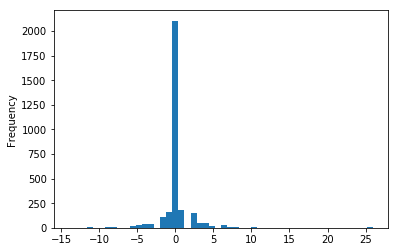

In [60]:
time_aggre_train['S-SA'].plot.hist(bins = 50)

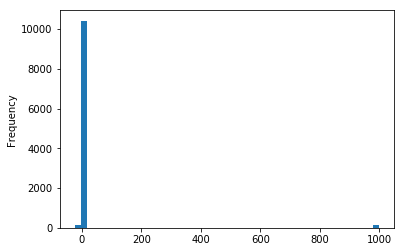

In [61]:
time_aggre_test['S-SA'].plot.hist(bins = 50)

In [77]:
list(time_aggre_test[time_aggre_test['S-SA'] > 200])

['dst_ip_internal',
 'src_ip_internal',
 'dst_port',
 'src_port',
 'packet_len',
 'time_stamp',
 'protocol_ICMP',
 'protocol_OTHER',
 'protocol_TCP',
 'protocol_UDP',
 'TCP_flag_A',
 'TCP_flag_FA',
 'TCP_flag_FAN',
 'TCP_flag_FPA',
 'TCP_flag_OTHER',
 'TCP_flag_PA',
 'TCP_flag_PAC',
 'TCP_flag_R',
 'TCP_flag_RA',
 'TCP_flag_S',
 'TCP_flag_SA',
 'TCP_flag_SAE',
 'TCP_flag_SEC',
 'S-SA']

In [80]:
time_stamps_ = time_aggre_test[time_aggre_test['S-SA'] > 200].index

In [82]:
X_test

,dst_ip_internal,src_ip_internal,dst_port,src_port,packet_len,protocol,TCP_flag,time_stamp
0,0,1,443,443,52,TCP,A,0
1,1,0,55848,55848,52,TCP,A,0
2,1,0,43060,43060,52,TCP,A,0
3,1,0,59225,59225,143,TCP,PA,0
4,0,1,443,443,52,TCP,A,0
5,0,1,443,443,249,TCP,PA,0
6,0,1,443,443,52,TCP,A,0
7,1,0,42918,42918,52,TCP,A,0
8,0,1,443,443,534,TCP,PA,0
9,1,0,59225,59225,52,TCP,A,0


In [81]:
time_aggre_test

,dst_ip_internal,src_ip_internal,dst_port,src_port,packet_len,time_stamp,protocol_ICMP,protocol_OTHER,protocol_TCP,protocol_UDP,...,TCP_flag_OTHER,TCP_flag_PA,TCP_flag_PAC,TCP_flag_R,TCP_flag_RA,TCP_flag_S,TCP_flag_SA,TCP_flag_SAE,TCP_flag_SEC,S-SA
time_stamp,,,,,,,,,,,,,,,,,,,,,
0,149,118,5832456,5832456,98726,0,0.0,0.0,195.0,30.0,...,30.0,66.0,0.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0
1,51,46,1950283,1950283,5505,97,0.0,0.0,97.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,31,25,1249805,1249805,2826,112,0.0,0.0,56.0,0.0,...,0.0,5.0,0.0,0.0,5.0,4.0,2.0,0.0,0.0,2.0
3,68,53,2088738,2088738,7062,318,0.0,0.0,91.0,15.0,...,15.0,11.0,0.0,2.0,7.0,5.0,1.0,0.0,0.0,4.0
4,34,27,1411437,1411437,2798,244,0.0,0.0,61.0,0.0,...,0.0,4.0,0.0,0.0,3.0,3.0,1.0,0.0,0.0,2.0
5,28,23,961745,961745,2692,255,0.0,0.0,49.0,2.0,...,2.0,1.0,0.0,0.0,4.0,4.0,3.0,0.0,0.0,1.0
6,93,96,2596208,2596208,27001,660,0.0,0.0,110.0,0.0,...,0.0,36.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0
7,23,24,794498,794498,6068,329,0.0,0.0,47.0,0.0,...,0.0,9.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0
8,23,21,921162,921162,3462,352,0.0,0.0,44.0,0.0,...,0.0,10.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


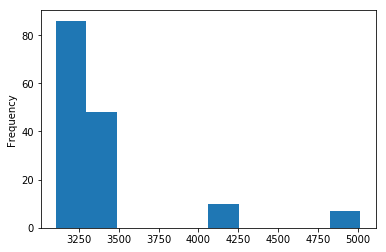

In [73]:
pd.Series(list(time_aggre_test[time_aggre_test['S-SA'] > 900].index)).plot.hist()

In [26]:
print(X_test.dst_port.value_counts().head())
print(X_train.dst_port.value_counts().head())

OTHER    1902541
HTTP      950406
HTTPS     554983
DNS       136978
SSH        17419
Name: dst_port, dtype: int64
OTHER    2672922
HTTP     1709888
HTTPS     322484
DNS        76977
SSH         4682
Name: dst_port, dtype: int64


In [18]:
X_test.dst_port = X_test.dst_port.astype(np.int64)
X_train.dst_port = X_train.dst_port.astype(np.int64)
X_test.src_port = X_test.src_port.astype(np.int64)
X_train.src_port = X_train.src_port.astype(np.int64)

In [26]:
#train tcp flag distribution
X_train.TCP_flag.value_counts()

A        4252769
PA        253385
OTHER     183604
FA         43000
S          23130
SA         22741
R           4141
RA          3172
FPA          999
SAE            6
SEC            6
Name: TCP_flag, dtype: int64

In [27]:
#test tcp flag distribution
X_test.TCP_flag.value_counts()

A        1858633
PA        526713
S         294333
OTHER     278280
RA        263477
FA        138669
SA        133352
FPA        51195
R          17561
SEC           41
PAC           40
SAE           31
FAN            2
Name: TCP_flag, dtype: int64

In [84]:
suspicious = X_test[(X_test.dst_ip_internal == 1)&(X_test.src_ip_internal == 0)&(X_test.TCP_flag == 'S')]

In [85]:
suspicious.src_ip.value_counts()

13.58.146.190      57994
107.22.224.100     34386
146.20.128.189     24313
146.20.128.223     23262
151.101.192.194    23215
13.59.43.55        21361
162.242.240.67     20342
104.97.137.26      19387
169.54.33.166      15437
104.16.26.35       10000
104.117.102.33      5910
Name: src_ip, dtype: int64

In [75]:
suspicious.src_ip.value_counts()

13.58.146.190      57994
107.22.224.100     34386
146.20.128.189     24313
146.20.128.223     23262
151.101.192.194    23215
13.59.43.55        21361
162.242.240.67     20342
104.97.137.26      19387
169.54.33.166      15437
104.16.26.35       10000
104.117.102.33      5910
Name: src_ip, dtype: int64

In [92]:
X_test[(X_test.src_ip == '13.58.146.190')|(X_test.dst_ip == '13.58.146.190')].to_csv("suspicious_attack.csv")

In [ ]:
mean_time_stamp = X_test.time_stamp - X_test.time_stamp.mean()
print(mean_time_stamp.max() - mean_time_stamp.min())
mean_time_stamp.plot.hist(bins = 30)

# ATTACK FOUND !!!!!!

In [101]:
#as we can see, huge amount of S and RA 
X_test[(X_test.src_ip == '13.58.146.190')|(X_test.dst_ip == '13.58.146.190')][3000:]

,TCP_ack,TCP_flag,TCP_seq,TCP_window,dst_ip,dst_port,packet_len,protocol,src_ip,src_port,time_stamp,src_to_dst_ip,time_std,time_interval,dst_ip_internal,src_ip_internal
579887,3869476527,RA,0,0,13.58.146.190,45002,40,TCP,192.168.10.50,45002,1.499450e+09,192.168.10.50->13.58.146.190,2197.965286,8.106232e-05,0,1
579888,0,S,3869476526,1024,192.168.10.50,1352,44,TCP,13.58.146.190,1352,1.499450e+09,13.58.146.190->192.168.10.50,2244.948699,4.601479e-05,1,0
579889,3869476527,RA,0,0,13.58.146.190,45002,40,TCP,192.168.10.50,45002,1.499450e+09,192.168.10.50->13.58.146.190,2197.965286,1.502037e-05,0,1
579890,3869476527,RA,0,0,13.58.146.190,45002,40,TCP,192.168.10.50,45002,1.499450e+09,192.168.10.50->13.58.146.190,2197.965286,2.479553e-05,0,1
579891,0,S,3869476526,1024,192.168.10.50,28201,44,TCP,13.58.146.190,28201,1.499450e+09,13.58.146.190->192.168.10.50,2244.948699,3.290176e-05,1,0
579892,0,S,3869476526,1024,192.168.10.50,1095,44,TCP,13.58.146.190,1095,1.499450e+09,13.58.146.190->192.168.10.50,2244.948699,5.006790e-06,1,0
579893,3869476527,RA,0,0,13.58.146.190,45002,40,TCP,192.168.10.50,45002,1.499450e+09,192.168.10.50->13.58.146.190,2197.965286,5.412102e-05,0,1
579894,3869476527,RA,0,0,13.58.146.190,45002,40,TCP,192.168.10.50,45002,1.499450e+09,192.168.10.50->13.58.146.190,2197.965286,6.914139e-06,0,1
579895,0,S,3869476526,1024,192.168.10.50,119,44,TCP,13.58.146.190,119,1.499450e+09,13.58.146.190->192.168.10.50,2244.948699,5.197525e-05,1,0
579896,0,S,3869476526,1024,192.168.10.50,2160,44,TCP,13.58.146.190,2160,1.499450e+09,13.58.146.190->192.168.10.50,2244.948699,3.504753e-05,1,0


In [100]:
X_test[(X_test.src_ip == '13.58.146.190')|(X_test.dst_ip == '13.58.146.190')].TCP_flag.value_counts()

S        57994
RA       57764
A        47514
PA        9841
SA        6660
FA        4976
FPA       3217
R          121
OTHER      100
Name: TCP_flag, dtype: int64

In [76]:
SA_suspicious = X_test[(X_test.dst_ip_internal == 0)&(X_test.src_ip_internal == 1)&(X_test.TCP_flag == 'SA')]

In [86]:
SA_suspicious.dst_ip.value_counts()

162.242.240.67     12486
169.54.33.166      10475
146.20.128.189     10315
146.20.128.223     10238
13.59.43.55        10220
151.101.192.194    10168
104.16.26.35       10000
13.58.146.190       6660
104.117.102.33      5910
107.22.224.100      5211
104.97.137.26       5078
Name: dst_ip, dtype: int64

In [64]:
suspicious.TCP_window.value_counts()

8192    8519
Name: TCP_window, dtype: int64

In [67]:
X_test.TCP_window.value_counts()

256      687334
229      457331
0        279322
OTHER    278280
29200    205251
8192     119869
1024      80006
65535     39767
61        34352
258       31523
16425     26185
251       25353
255       21463
31        21260
253       18743
946       17462
123       17406
64240     16297
254       15639
237       15426
360       15150
672       14803
252       14485
343       14093
245       12617
33        12362
62        12064
32        11902
980       11732
119       10716
          ...  
23396         1
10887         1
41617         1
42097         1
14822         1
8614          1
63512         1
32056         1
31381         1
48381         1
56360         1
7263          1
56880         1
45480         1
39578         1
12979         1
62657         1
30567         1
10339         1
42981         1
26070         1
18824         1
20874         1
11335         1
34395         1
11220         1
10579         1
10588         1
34415         1
8007          1
Name: TCP_window, Length

In [99]:
X_test.time_stamp.max()-X_test.time_stamp.min()

10961.15502691269

In [61]:
test_time_stamp = suspicious.time_stamp

In [58]:
test_time_stamp.min()

1499453806.757226

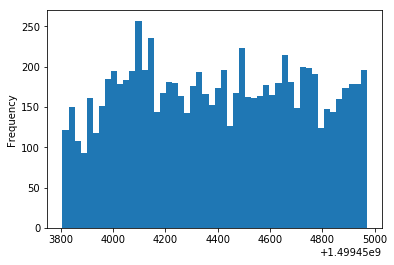

In [57]:
test_time_stamp.plot.hist(bins = 50)

In [59]:
X_test.time_stamp.min()

1499446800.014081

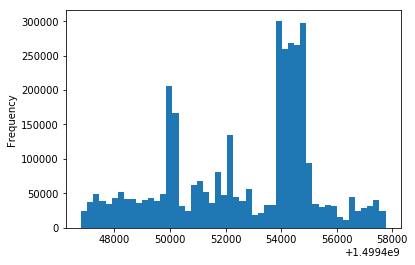

In [56]:
X_test.time_stamp.max()-X_test.time_stamp

In [27]:
train_dst_fre = X_train[(X_train.dst_ip_internal == 0) & (X_train.src_ip_internal == 1)].dst_port.value_counts()
test_dst_fre = X_test[(X_test.dst_ip_internal == 0) & (X_test.src_ip_internal == 1)].dst_port.value_counts()

In [14]:
#train_dst_fre

In [15]:
#train_dst_fre

In [20]:
test_dst_fre.head()

80       764966
7923       3640
9416       2951
10286      2886
56508      2724
Name: dst_port, dtype: int64

In [21]:
X_train.head()

,TCP_ack,TCP_flag,TCP_seq,TCP_window,dst_ip,dst_port,packet_len,protocol,src_ip,src_port,time_stamp,src_to_dst_ip,time_std,time_interval,dst_ip_internal,src_ip_internal
0,1220055066,A,3607095407,1021,192.168.10.14,51197,1500,TCP,13.107.4.50,80,1.499085e+09,13.107.4.50->192.168.10.14,8.627729,NaN,1,0
1,3607096867,A,1220055066,2075,13.107.4.50,80,40,TCP,192.168.10.14,51197,1.499085e+09,192.168.10.14->13.107.4.50,11.222483,NaN,0,1
2,1220055066,A,3607096867,1021,192.168.10.14,51197,1500,TCP,13.107.4.50,80,1.499085e+09,13.107.4.50->192.168.10.14,8.627729,0.000192,1,0
3,3607102707,A,1220055066,2081,13.107.4.50,80,40,TCP,192.168.10.14,51197,1.499085e+09,192.168.10.14->13.107.4.50,11.222483,0.000330,0,1
4,1220055066,A,3607098327,1021,192.168.10.14,51197,4420,TCP,13.107.4.50,80,1.499085e+09,13.107.4.50->192.168.10.14,8.627729,0.000193,1,0


In [16]:
#X_train[(X_train.dst_ip_internal == 1) & (X_train.src_ip_internal == 0)].dst_port.value_counts().head()

In [17]:
#X_train.dst_port.value_counts()

In [18]:
#X_test[(X_test.dst_ip_internal == 0) & (X_test.src_ip_internal == 1)].dst_port.value_counts().head()

In [24]:
#list(X_train_dummies)

In [25]:
#list(X_test_dummies)

In [26]:
X_test_dummies = X_test_dummies[list(X_train_dummies)]

In [27]:
X_test_dummies.shape

(3562327, 36)

In [32]:
X_train_dummies_ = X_train_dummies[(X_train_dummies.dst_ip_internal == 1)&(X_train_dummies.src_ip_internal == 0)]
X_test_dummies_ = X_test_dummies[(X_test_dummies.dst_ip_internal == 1)&(X_test_dummies.src_ip_internal == 0)]

In [34]:
X_train_dummies_.shape, X_test_dummies_.shape

((2566000, 36), (1778061, 36))

In [35]:
from sklearn.ensemble import IsolationForest
IF = IsolationForest(behaviour='new',contamination=0.01,random_state=42)

In [37]:
IF.fit(X_train_dummies_)

IsolationForest(behaviour='new', bootstrap=False, contamination=0.01,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=42, verbose=0, warm_start=False)

In [37]:
#X_train_preds = pd.Series(IF.predict(X_train_dummies))

In [41]:
#del X_train_preds

In [38]:
X_test_preds = pd.Series(IF.predict(X_test_dummies_))

In [50]:
X_test_preds.shape

(1778061,)

In [51]:
X_test_dummies_.shape

(1778061, 36)

In [55]:
X_test_dummies_ = X_test_dummies_.reset_index(drop = True)

In [74]:
X_test_dummies_[X_test_preds == 1].describe().to_csv("first_result_normal.csv")

In [75]:
X_test_dummies_[X_test_preds == -1].describe().to_csv("first_result_attack.csv")

In [63]:
X_test_dummies_[X_test_preds == -1].shape, X_test_dummies_[X_test_preds == 1].shape

((41035, 36), (1737026, 36))

In [67]:
X_test_dummies_[X_test_preds == 1]['TCP_flag_S'].value_counts()

0    1488311
1     248715
Name: TCP_flag_S, dtype: int64

In [66]:
X_test_dummies_[X_test_preds == -1]['TCP_flag_S'].value_counts()

0    34143
1     6892
Name: TCP_flag_S, dtype: int64

In [71]:
X_test_dummies_[X_test_preds == -1][X_test_dummies_[X_test_preds == -1].time_interval != -1]['dst_']

,TCP_ack,TCP_seq,TCP_window,packet_len,time_stamp,time_std,time_interval,dst_ip_internal,src_ip_internal,TCP_flag_A,...,protocol_ICMP,protocol_OTHER,protocol_TCP,protocol_UDP,src_port_DNS,src_port_FTP,src_port_HTTP,src_port_HTTPS,src_port_OTHER,src_port_SSH
212,0,2235330734,29200,60,1.499447e+09,1992.326914,2.501987,1,0,0,...,0,0,1,0,0,0,1,0,0,0
284,0,1245157454,29200,60,1.499447e+09,1992.326914,2.040226,1,0,0,...,0,0,1,0,0,0,0,1,0,0
285,0,1279379908,29200,60,1.499447e+09,2244.948699,3.340841,1,0,0,...,0,0,1,0,0,0,0,0,0,1
286,0,366517641,29200,60,1.499447e+09,2296.053968,0.737266,1,0,0,...,0,0,1,0,0,0,1,0,0,0
299,1195303898,3406426783,33580,40,1.499447e+09,2556.991941,2.003220,1,0,0,...,0,0,1,0,0,0,0,0,1,0
324,1748711763,2081167321,28960,60,1.499447e+09,3158.862252,6.851916,1,0,0,...,0,0,1,0,0,0,0,0,1,0
330,3446119118,1211415143,946,40,1.499447e+09,2739.945050,5.732016,1,0,0,...,0,0,1,0,0,0,0,0,1,0
337,0,1454513321,29200,60,1.499447e+09,2296.053968,2.501576,1,0,0,...,0,0,1,0,0,0,0,1,0,0
354,4243484714,1241013940,972,52,1.499447e+09,2990.006946,7.261380,1,0,0,...,0,0,1,0,0,0,0,0,1,0
419,0,910233234,29200,60,1.499447e+09,2296.053968,1.300965,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [73]:
import numpy as np
from sklearn import mixture
np.random.seed(1)
g = mixture.GaussianMixture(n_components=2, covariance_type = "full")
g.fit(X_train_dummies)

MemoryError: Unable to allocate array with shape (4786953, 36) and data type float64

In [32]:
#extract the messages that sent from external ip to internal ip
extracted_train = X_train[(X_train.dst_ip_internal == 1) & (X_train.src_ip_internal == 0)]
extracted_test = X_test[(X_test.dst_ip_internal == 1) & (X_test.src_ip_internal == 0)]

In [33]:
#map the source ip into its frequency in the whole dataset
train_srcip_fre_map = extracted_train.src_ip.value_counts()
test_srcip_fre_map = extracted_test.src_ip.value_counts()
extracted_train.src_ip = extracted_train.src_ip.map(train_srcip_fre_map)
extracted_test.src_ip = extracted_test.src_ip.map(test_srcip_fre_map)

/usr/lib/python3/dist-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [34]:
extracted_train.src_ip = extracted_train.src_ip.astype(int)
extracted_test.src_ip = extracted_test.src_ip.astype(int)

/usr/lib/python3/dist-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [35]:
extracted_train.drop(["src_to_dst_ip", "dst_ip_internal", "src_ip_internal"], axis = 1, inplace = True)
extracted_test.drop(["src_to_dst_ip", "dst_ip_internal", "src_ip_internal"], axis = 1, inplace = True)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [37]:
dst_ips = ['dst_ip_192.168.10.12','dst_ip_192.168.10.14','dst_ip_192.168.10.15','dst_ip_192.168.10.16', 'dst_ip_192.168.10.17', 'dst_ip_192.168.10.19', 'dst_ip_192.168.10.25', 'dst_ip_192.168.10.5', 'dst_ip_192.168.10.50', 'dst_ip_192.168.10.51', 'dst_ip_192.168.10.8','dst_ip_192.168.10.9']

In [40]:
dst_ips = extracted_train.dst_ip.value_counts().index

In [81]:
print(extracted_test[extracted_test.dst_ip == dst_ips[0]].shape[0]/extracted_test.shape[0])
extracted_train[extracted_train.dst_ip == dst_ips[0]].shape[0]/extracted_train.shape[0]

0.07581517169545926


0.7915198752922837

In [147]:
extracted_dummies_train = pd.get_dummies(extracted_train)
print(extracted_dummies_train[dst_ips].head())
#extract the dummies dfs for all dst ids
from sklearn.preprocessing import StandardScaler
train_dst_ips_ = [] 
for i in range(len(dst_ips)):
    #extract the corresponding df and drop other irrelevent columns
    train_dst_ips_.append(extracted_dummies_train[extracted_dummies_train[dst_ips[i]] == 1].drop(dst_ips, axis = 1).values)

sample_df = train_dst_ips_[2]

sample_df.shape

#calculate mean and covariance of this dataframe
def calculate_mean_covariance(df):
    length_ = df.shape[0]
    mu = np.mean(df, axis = 0)
    df = df - mu
    cov = (df.T @ df)/length_
    return mu, cov

mu, cov = calculate_mean_covariance(sample_df)

print("mu: ", mu)
print("covariance_matrix: ", cov)

# calculate the distribution of the test instance
def multi_gauss_prob(x_test, mu, cov):
    x_test = x_test - mu
    cov_mat_inv = np.linalg.pinv(cov)
    cov_mat_det = np.linalg.det(cov)
    n = cov.shape[0]
    return (np.exp(-0.5 * np.dot(x_test, np.dot(cov_mat_inv, x_test.T))) 
            / (2. * np.pi)**(n/2.) 
            / np.sqrt(cov_mat_det))

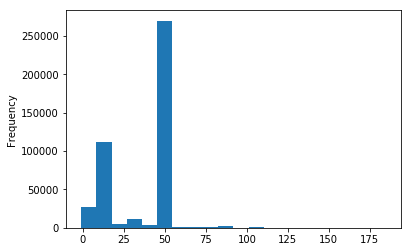

In [261]:
extracted_train.time_std.plot.hist(bins = 20)

In [144]:
extracted_train.TCP_flag.value_counts()

A        407033
PA        22232
SA         2858
FA         2761
OTHER       992
FPA          81
RA           60
R            47
Name: TCP_flag, dtype: int64

In [281]:
# percentage of internal destination ip 
X_test[X_test.dst_ip_internal == 1].dst_ip.shape[0]/X_test.shape[0]

0.6001212129038126

In [282]:
# it is interesting to note that there are only about 15 distinct internal ip
train_internal_ips = X_train[X_train.dst_ip_internal == 1].dst_ip.value_counts()
test_internal_ips = X_test[X_test.dst_ip_internal == 1].dst_ip.value_counts()
train_num_internal_ips = train_internal_ips.shape[0]
test_num_internal_ips = test_internal_ips.shape[0]

print("There are %d distinct internal ip address in train data"%train_num_internal_ips)
print("Which are:")
print(train_internal_ips)

print("There are %d distinct internal ip address in test data"%test_num_internal_ips)
print("Which are:")
print(test_internal_ips)

There are 15 distinct internal ip address in train data
Which are:
192.168.10.15     285254
192.168.10.14     112476
192.168.10.5       20129
192.168.10.3        8279
192.168.10.16       5473
192.168.10.12       5273
192.168.10.9        5264
192.168.10.25       3688
192.168.10.50       2291
192.168.10.17       1779
192.168.10.1        1257
192.168.10.51       1143
192.168.10.19        872
192.168.10.255       741
192.168.10.8         372
Name: dst_ip, dtype: int64
There are 15 distinct internal ip address in test data
Which are:
192.168.10.50     963632
192.168.10.15     155713
192.168.10.3      154234
192.168.10.8      123020
192.168.10.16     117191
192.168.10.5      106601
192.168.10.17     106521
192.168.10.12      92311
192.168.10.9       89714
192.168.10.14      77950
192.168.10.19      69900
192.168.10.25      46173
192.168.10.1       22855
192.168.10.255      7683
192.168.10.51       4330
Name: dst_ip, dtype: int64


In [271]:
#same internal ips in training and testing sets
set(train_internal_ips.index).difference(set(test_internal_ips.index))

set()

In [287]:
X_test[X_test.src_ip_internal == 1].src_ip.value_counts()

192.168.10.50    718636
192.168.10.15    145255
192.168.10.3     141771
192.168.10.8     105922
192.168.10.16    104610
192.168.10.17     98390
192.168.10.5      95890
192.168.10.12     86654
192.168.10.9      79363
192.168.10.14     74433
192.168.10.19     63472
192.168.10.25     43090
192.168.10.1      22855
192.168.10.51      3925
Name: src_ip, dtype: int64

In [299]:
X_test[(X_test.dst_ip == '192.168.10.3') & (X_test.flag == "S")].dst_port.value_counts()

389      276
88       144
3268     118
445      108
389       42
135       40
49666     38
445       34
3268      30
49671     16
135       10
49666     10
49671      4
88         2
Name: dst_port, dtype: int64